In [1]:
import numpy as np
import pandas as pd
import sys,os
import scipy.optimize as spo
sys.path.append(sys.path[0] + '/..')

import matplotlib.pyplot as plt
import matplotlib

from imp import reload
import platereaderclass as prc; reload(prc);
import plates_EstimateMSP as eMSP; reload(eMSP);


In [2]:
basedir = '/home/lukas/projects/antibiotics/experiments/200129_AllData/'

design_assignment_andy = {  'andy_WT.xlsx':         [0, 1, 2], 
                            'andy_TEM1.xlsx':       [0, 0, 1, 1, 2, 2], 
                            'andy_E104KG238S.xlsx': [0, 0, 1, 1, 2, 2],
                            'andy_G238S.xlsx':      [0, 0, 1, 1, 2, 2],
                            'andy_Triple.xlsx':     [0, 1, 2]}

design_assignment_philip = {'philip_G238S.xlsx':    [0, 0, 0, 0, 0, 0, 0, 0],
                            'philip_Triple.xlsx':   [0, 0, 1, 1, 1, 1, 0, 0]}



In [3]:
allfiles = [basedir + 'andy/data/' + filename for filename in design_assignment_andy.keys()] + [basedir + 'philip/data/' + filename for filename in design_assignment_philip.keys()]
alldesigns = []
for exp,designs in design_assignment_andy.items():
    try:
        m = np.max(alldesigns)
    except:
        m = -1
    alldesigns += [d+m+1 for d in designs]
for exp,designs in design_assignment_philip.items():
    m = np.max(alldesigns)
    alldesigns += [d+m+1 for d in designs]


data = prc.PlateReaderData(infiles = allfiles, DesignAssignment = alldesigns)

In [4]:
all_OD_values = np.array([])
for filename,sheetname,OD_values,designassignment in data:
    print(sheetname, designassignment)
    all_OD_values = np.concatenate([all_OD_values,OD_values.flatten()])


andyWT_A 0
andyWT_B 1
andyWT_C 2
TEM1-IPTG A 3
TEM1+IPTG A 3
TEM1-IPTG B 4
TEM1+IPTG B 4
TEM1-IPTG C 5
TEM1+IPTG C 5
E104KG238S-IPTG A 6
E104KG238S+IPTG A 6
E104KG238S-IPTG B 7
E104KG238S+IPTG B 7
E104KG238S-IPTG C 8
E104KG238S+IPTG C 8
G238S-IPTG A 9
G238S+IPTG A 9
G238S-IPTG B 10
G238S+IPTG B 10
G238S-IPTG C 11
G238S+IPTG C 11
andyTriple_A 12
andyTriple_B 13
andyTriple_C 14
G238S None 1 15
G238S None 2 15
G238S High 1 15
G238S High 2 15
G238S Med 1 15
G238S Med 2 15
G238S Low 1 15
G238S Low 2 15
Triple None 1 16
Triple None 2 16
Triple High 1 17
Triple High 2 17
Triple Med 1 17
Triple Med 2 17
Triple Low 1 16
Triple Low 2 16


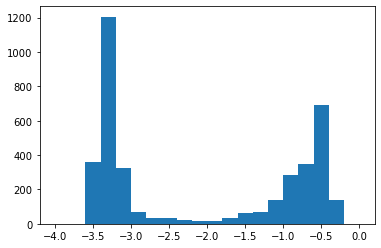

In [6]:
plt.hist(np.log(all_OD_values), range=(-4,0), bins = 20)
plt.show()

andy_WT.xlsx [0, 1, 2]


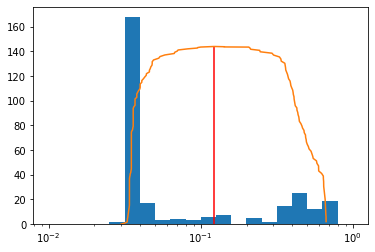

andy_TEM1.xlsx [0, 0, 1, 1, 2, 2]


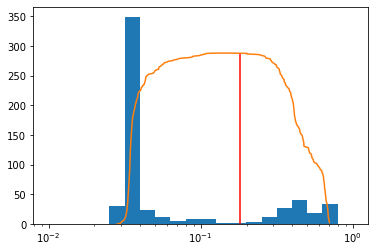

andy_E104KG238S.xlsx [0, 0, 1, 1, 2, 2]


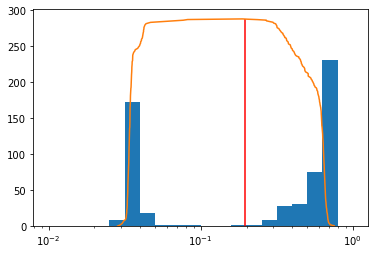

andy_G238S.xlsx [0, 0, 1, 1, 2, 2]


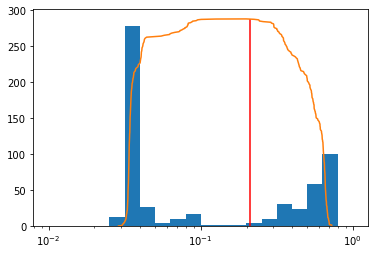

andy_Triple.xlsx [0, 1, 2]


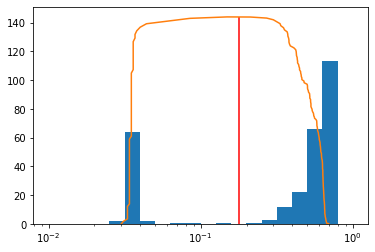

In [43]:
def compute_otsu(values):
    values.sort()
    m = len(values)
    lv = np.log(values)
    r = [(n * np.sum(lv) - m * np.sum(lv[:n]))**2/(n*(m-n)) if n != 0 and n!=m else 0 for n in range(m)]
    rmax = np.max(r)
    vmax = np.sqrt(values[np.argmax(r)] * values[np.argmax(r)+1])
    return np.array(r)/rmax*m*.5,vmax

for filename, design in design_assignment_andy.items():
    print(filename, design)
    data_singleplate = prc.PlateReaderData(infiles = [basedir + 'andy/data/' + filename], DesignAssignment = design)
    
    OD_singleplate = np.concatenate([od.flatten() for x,y,od,z in data_singleplate])
    OD_singleplate.sort()
    
    otsu,OD_thres = compute_otsu(OD_singleplate)
    
    #print(OD_singleplate)
    bins = 10**np.linspace(-2,0,num=21)
    plt.hist(OD_singleplate, bins=bins)
    plt.plot(OD_singleplate, otsu)
    plt.vlines(OD_thres,ymin=0,ymax=np.max(otsu), color = 'red')
    plt.xscale('log')
    plt.show()